<a href="https://colab.research.google.com/github/FrancescoMusi/Laboratory-of-machine-learning-and-advanced-computing-for-physics/blob/main/6_Elbow_method_and_BIC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-means and clustering

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

## Data of electronegativities and atomic rays

In [ ]:
# Synthetic dataset: Electronegativity vs Atomic Radius
elements = ["H", "He", "O", "N", "F", "Ne", "Na", "Cl", "Ar", "K", "Br", "Xe"]

# Generate electronegativity and atomic radius values
electronegativity = np.array([2.20, 0.00, 3.44, 3.04, 3.98, 0.00, 0.93, 3.16, 0.00, 0.82, 2.96, 0.00])
atomic_radius = np.array([53, 31, 66, 71, 57, 38, 186, 99, 71, 227, 114, 140])

### **Definizione del Dataset**

Qui stiamo creando manualmente un piccolo dataset sintetico che rappresenta degli elementi chimici.

1.  **`elements = [...]`**:
    È una lista di stringhe con i simboli chimici degli elementi che stiamo analizzando (Idrogeno, Elio, Ossigeno, ecc.). Serviranno solo per etichettare i punti nel grafico finale.

2.  **`electronegativity = np.array([...])`**:
    Un array NumPy che contiene i valori di **elettronegatività** per ciascun elemento. Questa è la nostra prima *feature* (caratteristica).

3.  **`atomic_radius = np.array([...])`**:
    Un array NumPy con i **raggi atomici** (in picometri). Questa è la seconda *feature*.

L'obiettivo del clustering sarà raggruppare questi elementi in base alla somiglianza di queste due proprietà chimico-fisiche.

In [ ]:
# Normalize data
X = np.column_stack((electronegativity, atomic_radius))
X = (X - X.mean(axis=0)) / X.std(axis=0)

### **Normalizzazione dei Dati**

Questo passaggio è cruciale per il K-Means (vedi **Capitolo 2.2.3** del PDF: *The Curse of Dimensionality* e l'importanza delle metriche di distanza).

1.  **`X = np.column_stack(...)`**:
  Uniamo i due array 1D (`electronegativity` e `atomic_radius`) in un'unica matrice `X` di dimensioni $N \times 2$. Ogni riga rappresenta un elemento chimico, la colonna 0 è l'elettronegatività, la colonna 1 è il raggio atomico.

2.  **`X = (X - X.mean(axis=0)) / X.std(axis=0)`**:
    Questa riga esegue la **Standardizzazione** (o Z-score normalization).
    * `X.mean(axis=0)`: Calcola la media di ogni colonna.
    * `X.std(axis=0)`: Calcola la deviazione standard di ogni colonna.
    * Sottraiamo la media e dividiamo per la deviazione standard.

    **Perché lo facciamo?**
    Il raggio atomico ha valori intorno a 100-200, mentre l'elettronegatività varia tra 0 e 4. Se non normalizzassimo, la distanza Euclidea sarebbe dominata quasi interamente dal raggio atomico (perché ha numeri più grandi). Normalizzando, portiamo entrambe le feature sulla stessa scala (media 0, varianza 1), rendendo il calcolo della distanza equo.

## Build a function for the K-means algorithm

In [ ]:
from scipy.spatial.distance import cdist

def k_means(X, K, max_iters=100, tol=1e-4):
    """
    Perform K-Means clustering using only NumPy and SciPy.

    Parameters:
    - X: (N, d) ndarray, dataset with N points and d features.
    - K: int, number of clusters.
    - max_iters: int, maximum number of iterations.
    - tol: float, convergence tolerance.

    Returns:
    - centroids: (K, d) ndarray, final cluster centers.
    - labels: (N,) ndarray, cluster assignments for each point.
    """
    N, d = X.shape

    # Step 1: Randomly initialize K centroids
    centroids = X[np.random.choice(N, K, replace=False)]

    for _ in range(max_iters):
        # Step 2: Assign each point to the nearest centroid
        distances = cdist(X, centroids, metric='euclidean')  # (N, K)
        labels = np.argmin(distances, axis=1)  # (N,)

        # Step 3: Compute new centroids
        new_centroids = np.array([X[labels == a].mean(axis=0) for a in range(K)])

        # Step 4: Check convergence (change in centroids)
        if np.linalg.norm(new_centroids - centroids) < tol:
            break

        centroids = new_centroids

    return centroids, labels

### **Algoritmo K-Means**

Qui implementiamo da zero l'algoritmo **K-Means**, descritto nel **Capitolo 2.2.1** del PDF.

1.  **`centroids = X[np.random.choice(N, K, replace=False)]`**:
  **Step 1: Inizializzazione.** Scegliamo casualmente $K$ punti dal dataset `X` per usarli come centroidi iniziali.

2.  **`for _ in range(max_iters):`**:
    Inizia il ciclo principale dell'algoritmo (ripeti fino a convergenza).

3.  **`distances = cdist(X, centroids, metric='euclidean')`**:
  Calcoliamo la distanza Euclidea tra *ogni* punto del dataset e *ogni* centroide. Il risultato è una matrice di distanze.

4.  **`labels = np.argmin(distances, axis=1)`**:
  **Step 2: Assegnazione.** Per ogni punto (riga), troviamo l'indice del centroide più vicino (`argmin`). Questo indice diventa l'etichetta del cluster del punto (es. punto 0 appartiene al cluster 2).
  Matematicamente: $S_a = \{x_i : ||x_i - \mu_a||^2 \le ||x_i - \mu_b||^2 \}$

5.  **`new_centroids = np.array([X[labels == a].mean(axis=0) for a in range(K)])`**:
  **Step 3: Aggiornamento.** Ricalcoliamo la posizione dei centroidi. Il nuovo centroide del cluster $a$ è semplicemente la media geometrica di tutti i punti assegnati a quel cluster.
  Matematicamente: $\mu_a = \frac{1}{|S_a|} \sum_{x_i \in S_a} x_i$

6.  **`if np.linalg.norm(new_centroids - centroids) < tol: break`**:
  **Step 4: Convergenza.** Se i centroidi si sono spostati pochissimo (meno di `tol`) rispetto al giro precedente, l'algoritmo si ferma perché ha trovato una soluzione stabile.

## Run it on dataset
Use some guess for optimal $K$, here.

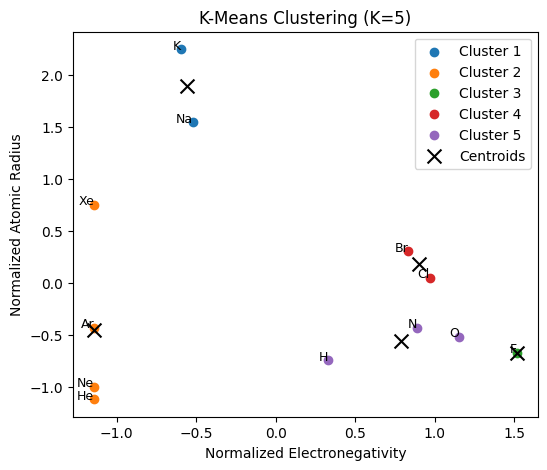

In [ ]:
np.random.seed(0)
# Run K-means with optimal K (e.g., from analysis, assuming K=3)
optimal_K = 5  # Adjust based on plots
centroids, labels = k_means(X, optimal_K)

# Scatter plot with clusters
plt.figure(figsize=(6, 5))
for k in range(optimal_K):
    plt.scatter(X[labels == k, 0], X[labels == k, 1], label=f'Cluster {k+1}')
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', marker='x', s=100, label='Centroids')
for i, elem in enumerate(elements):
    plt.text(X[i, 0], X[i, 1], elem, fontsize=9, ha='right')
plt.xlabel('Normalized Electronegativity')
plt.ylabel('Normalized Atomic Radius')
plt.legend()
plt.title(f'K-Means Clustering (K={optimal_K})')
plt.show()

### **Esecuzione e Plot**

Qui applichiamo l'algoritmo ai nostri dati chimici.

1.  **`optimal_K = 5`**:
    Impostiamo arbitrariamente il numero di cluster a 5. In uno scenario reale, questo valore andrebbe scelto analizzando i grafici che vedremo dopo (Elbow Method).

2.  **`centroids, labels = k_means(X, optimal_K)`**:
    Lanciamo la nostra funzione e otteniamo le posizioni finali dei centroidi e le etichette per ogni elemento.

3.  **Il ciclo `for k in range(optimal_K)`:**
    Disegniamo i punti (scatter plot), colorandoli in base al cluster di appartenenza (`X[labels == k]`).

4.  **`plt.scatter(..., marker='x', ...)`**:
    Disegniamo i **centroidi** come delle "X" nere grandi sopra i cluster, per visualizzare il "centro di gravità" di ogni gruppo.

5.  **`plt.text(...)`**:
    Aggiungiamo le etichette degli elementi (H, He, ecc.) vicino a ogni punto per rendere il grafico leggibile chimicamente.

## Build a function for the loss

In [ ]:
def compute_wcss(X, max_K=10):
    """Compute Within-Cluster Sum of Squares (WCSS) for different K."""
    wcss = []
    for K in range(1, max_K+1):
        centroids, labels = k_means(X, K)
        wcss.append(np.sum([np.linalg.norm(X[labels == k] - centroids[k])**2 for k in range(K)]))
    return wcss

### **WCSS (Within-Cluster Sum of Squares)**

Questa funzione serve per applicare l'**Elbow Method** (Metodo del Gomito), descritto nel **Capitolo 2.2.2** del PDF.

1.  **`for K in range(1, max_K+1):`**:
    Eseguiamo il K-Means per diversi valori di K (da 1 a 10 cluster).

2.  **`np.sum([np.linalg.norm(X[labels == k] - centroids[k])**2 ...])`**:
  Calcoliamo la **WCSS** (o Inerzia, vedi Eq. 2.30 del PDF).
  È la somma dei quadrati delle distanze tra ogni punto e il suo centroide assegnato.
  $$\mathcal{L} = \sum_{a=1}^K \sum_{x_i \in S_a} ||x_i - \mu_a||^2$$
  Questa metrica ci dice quanto sono "compatti" i cluster. Più è bassa, meglio è, ma diminuisce sempre all'aumentare di K. Cerchiamo il punto di flesso ("gomito") dove la diminuzione rallenta bruscamente.

## Build the silhouette score and the BIC to evaluate $K^{best}$

In [ ]:
def silhouette_score(X, labels):
    """Compute Silhouette Score for given labels."""
    N = len(X)
    unique_labels = np.unique(labels)
    if len(unique_labels) == 1:
        return 0  # Only one cluster, silhouette is not defined

    silhouettes = []
    for i in range(N):
        same_cluster = X[labels == labels[i]]
        other_clusters = [X[labels == k] for k in unique_labels if k != labels[i]]

        a_i = np.mean(cdist([X[i]], same_cluster, 'euclidean'))
        b_i = min([np.mean(cdist([X[i]], cluster, 'euclidean')) for cluster in other_clusters])
        silhouettes.append((b_i - a_i) / max(a_i, b_i))

    return np.mean(silhouettes)

def compute_silhouette_scores(X, max_K=10):
    """Compute silhouette scores for different K."""
    scores = []
    for K in range(2, max_K+1):
        centroids, labels = k_means(X, K)
        scores.append(silhouette_score(X, labels))
    return scores

def compute_bic(X, max_K=10):
    """Compute Bayesian Information Criterion (BIC) for different K."""
    N, d = X.shape
    bic = []
    for K in range(1, max_K+1):
        centroids, labels = k_means(X, K)
        log_likelihood = -np.sum([np.linalg.norm(X[labels == k] - centroids[k])**2 for k in range(K)])
        num_params = K * d
        bic.append(-2 * log_likelihood + num_params * np.log(N))
    return bic

### **Spiegazione del Codice: Silhouette Score e BIC**

Qui implementiamo altre due metriche per valutare la qualità del clustering (**Capitolo 2.2.2** del PDF).

1.  **`silhouette_score`**:
    Misura quanto un punto è simile al suo cluster rispetto agli altri cluster.
    * `a_i`: Distanza media dagli altri punti *nello stesso* cluster (coesione).
    * `b_i`: Distanza media dai punti del cluster *più vicino* (separazione).
    *
  Formula: $s_i = \frac{b_i - a_i}{\max(a_i, b_i)}$.
    * Valori vicini a +1 indicano ottimi cluster, vicini a 0 cluster sovrapposti, negativi assegnazioni errate.

2.  **`compute_bic` (Bayesian Information Criterion)**:
    Una metrica statistica per la selezione del modello.
    * `log_likelihood`: Stimata approssimativamente come la somma dei quadrati delle distanze (negativa, perché stiamo minimizzando l'errore).
    * `num_params`: Penalità per la complessità del modello ($K \times d$).
    * Formula approssimata: $BIC = -2 \cdot \ln(\hat{L}) + p \cdot \ln(N)$.
    * Cerchiamo il valore di K che minimizza il BIC (o lo massimizza, a seconda della formulazione, qui stiamo calcolando una versione dove cerchiamo il minimo del "gomito" invertito).

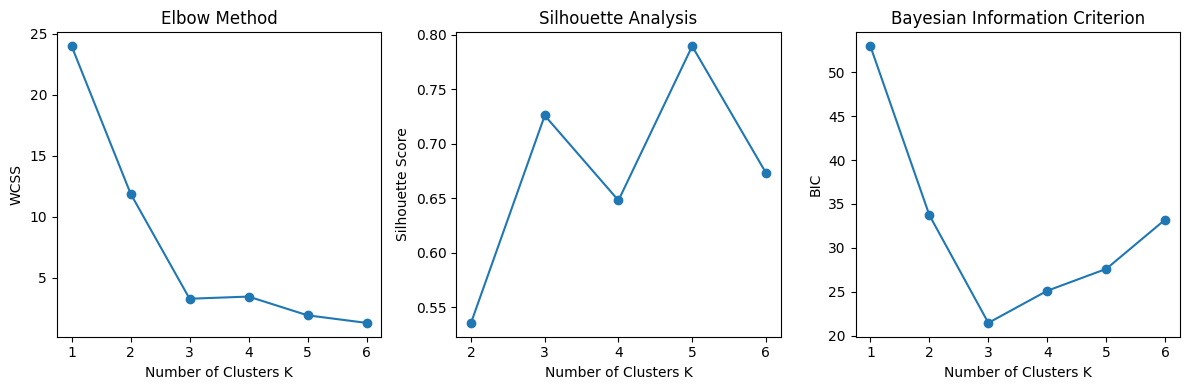

In [ ]:
np.random.seed(0)
# Compute metrics
max_K = 6
wcss = compute_wcss(X, max_K)
silhouette_scores = compute_silhouette_scores(X, max_K)
bic = compute_bic(X, max_K)

# Plot Elbow Method
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.plot(range(1, max_K + 1), wcss, marker='o')
plt.xlabel('Number of Clusters K')
plt.ylabel('WCSS')
plt.title('Elbow Method')

# Plot Silhouette Score
plt.subplot(1, 3, 2)
plt.plot(range(2, max_K + 1), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters K')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis')

# Plot BIC
plt.subplot(1, 3, 3)
plt.plot(range(1, max_K + 1), bic, marker='o')
plt.xlabel('Number of Clusters K')
plt.ylabel('BIC')
plt.title('Bayesian Information Criterion')

plt.tight_layout()
plt.show()


### **Spiegazione del Grafico: Confronto Metriche**

Qui visualizziamo i risultati delle tre metriche per scegliere il miglior K.

1.  **Elbow Method (WCSS)**:
    Il grafico scende rapidamente. Cerchiamo il punto dove la curva si appiattisce (il gomito). Potrebbe essere intorno a K=3 o K=4.

2.  **Silhouette Score**:
    Cerchiamo il picco massimo. Il valore di K con lo score più alto indica la configurazione dove i cluster sono meglio separati e definiti.

3.  **BIC**:
    Simile all'Elbow, cerchiamo un punto di flesso che bilanci l'adattamento ai dati (basso errore) con la complessità del modello (pochi cluster).